In [1]:
import numpy as np #linear algebra
import pandas as pd #data proceessing,csv file I/O (eg. pd.read_csv)

#input data files are available in the "../input/"directory,
#for example,running this (by clicking run or pressing shift+enter)will list all files under the input directory
#any results you write to the current directory are saved as output.

import sklearn.model_selection
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
#warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore') #change once to ignore when publishing

C:\Users\91888\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\91888\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
C:\Users\91888\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn.metrics import accuracy_score

rituximab = pd.read_csv("C:\\Users\\91888\\Downloads\\rituximab.csv")
rit =rituximab.copy()
rit.coloumns=['FSCH','SSCH','FL1H','FL2H','FL3H','FL1A','FL1W','Time','Gate']#if u dont give any colom then length mismatch #we give name for each colom
rit.head(20)            #return first 5 rows

,FSC.H,SSC.H,FL1.H,FL2.H,FL3.H,FL1.A,FL1.W,Time,Gate
0,309,376,264,198,313,0,0,2,1
1,83,55,139,51,146,0,0,2,1
2,184,198,232,83,124,0,0,2,1
3,169,75,696,22,193,121,26,2,2
4,212,98,166,0,221,0,0,2,1
5,164,143,108,160,117,0,0,2,1
6,525,628,581,250,50,39,0,2,1
7,80,41,84,0,190,0,0,2,1
8,369,306,405,106,199,2,0,2,1
9,152,129,113,83,54,0,0,2,1


In [3]:
rit1 = rit.drop('Time',axis=1)  # time parameter is neglected so removed from copy of dataset
rit1 = rit1[rit1['Gate']!=-1]   #gate with values -1 are noicy
rit1.loc[:,'Gate']=rit1.loc[:,"Gate"].map({1:0,2:1})   #loc is somekind of lable  #gate 2 is changesto 1 is changed to 0
print('The dataset contains',rit1.isnull().sum().sum(),"null values")
print('The first 15 elements of the cleaned dataset are shown below')
rit1.head(15)

The dataset contains 0 null values
The first 15 elements of the cleaned dataset are shown below


,FSC.H,SSC.H,FL1.H,FL2.H,FL3.H,FL1.A,FL1.W,Gate
0,309,376,264,198,313,0,0,0
1,83,55,139,51,146,0,0,0
2,184,198,232,83,124,0,0,0
3,169,75,696,22,193,121,26,1
4,212,98,166,0,221,0,0,0
5,164,143,108,160,117,0,0,0
6,525,628,581,250,50,39,0,0
7,80,41,84,0,190,0,0,0
8,369,306,405,106,199,2,0,0
9,152,129,113,83,54,0,0,0


In [13]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(rit1,test_size=0.2,random_state=42)
#splitting 80 20 
train_lables=train_set.copy()['Gate']
test_labels=train_set.copy()['Gate']
test_no_labels=train_set.copy()['Gate']
test_no_labels=test_set.copy().drop('Gate',axis=1)
print('The train set has ',train_set.shape[0],'data points')#what is shape
print('The test set has ',test_set.shape[0],'data points')

The train set has  1099 data points
The test set has  275 data points


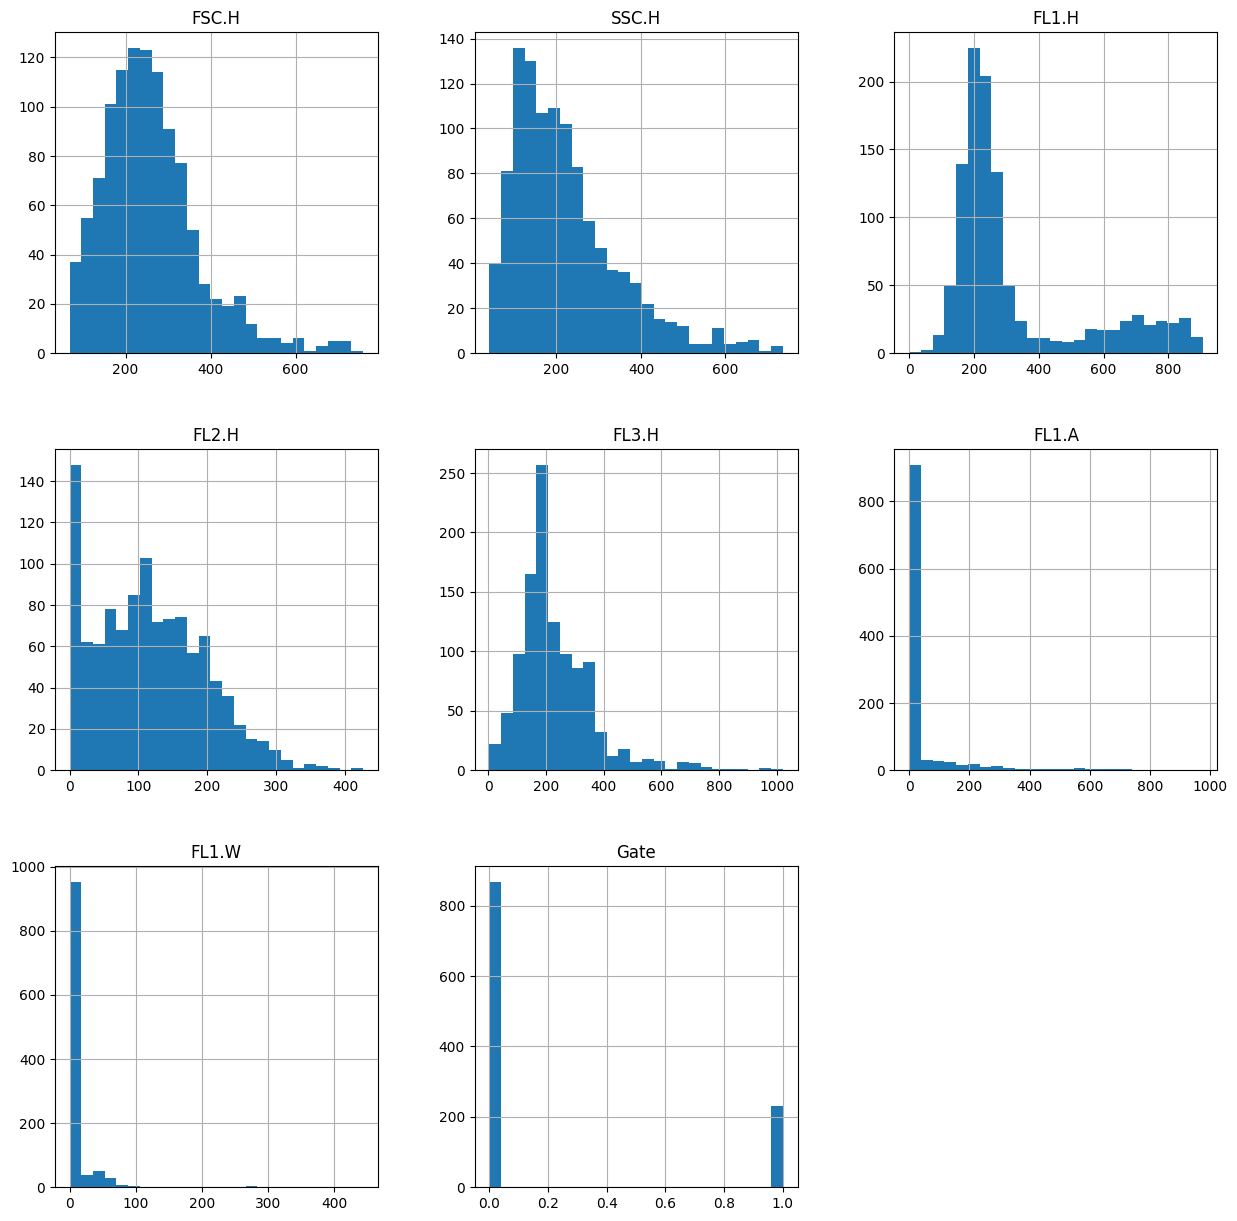

In [5]:
train_set.hist(bins=25, figsize=(15,15))
plt.show()

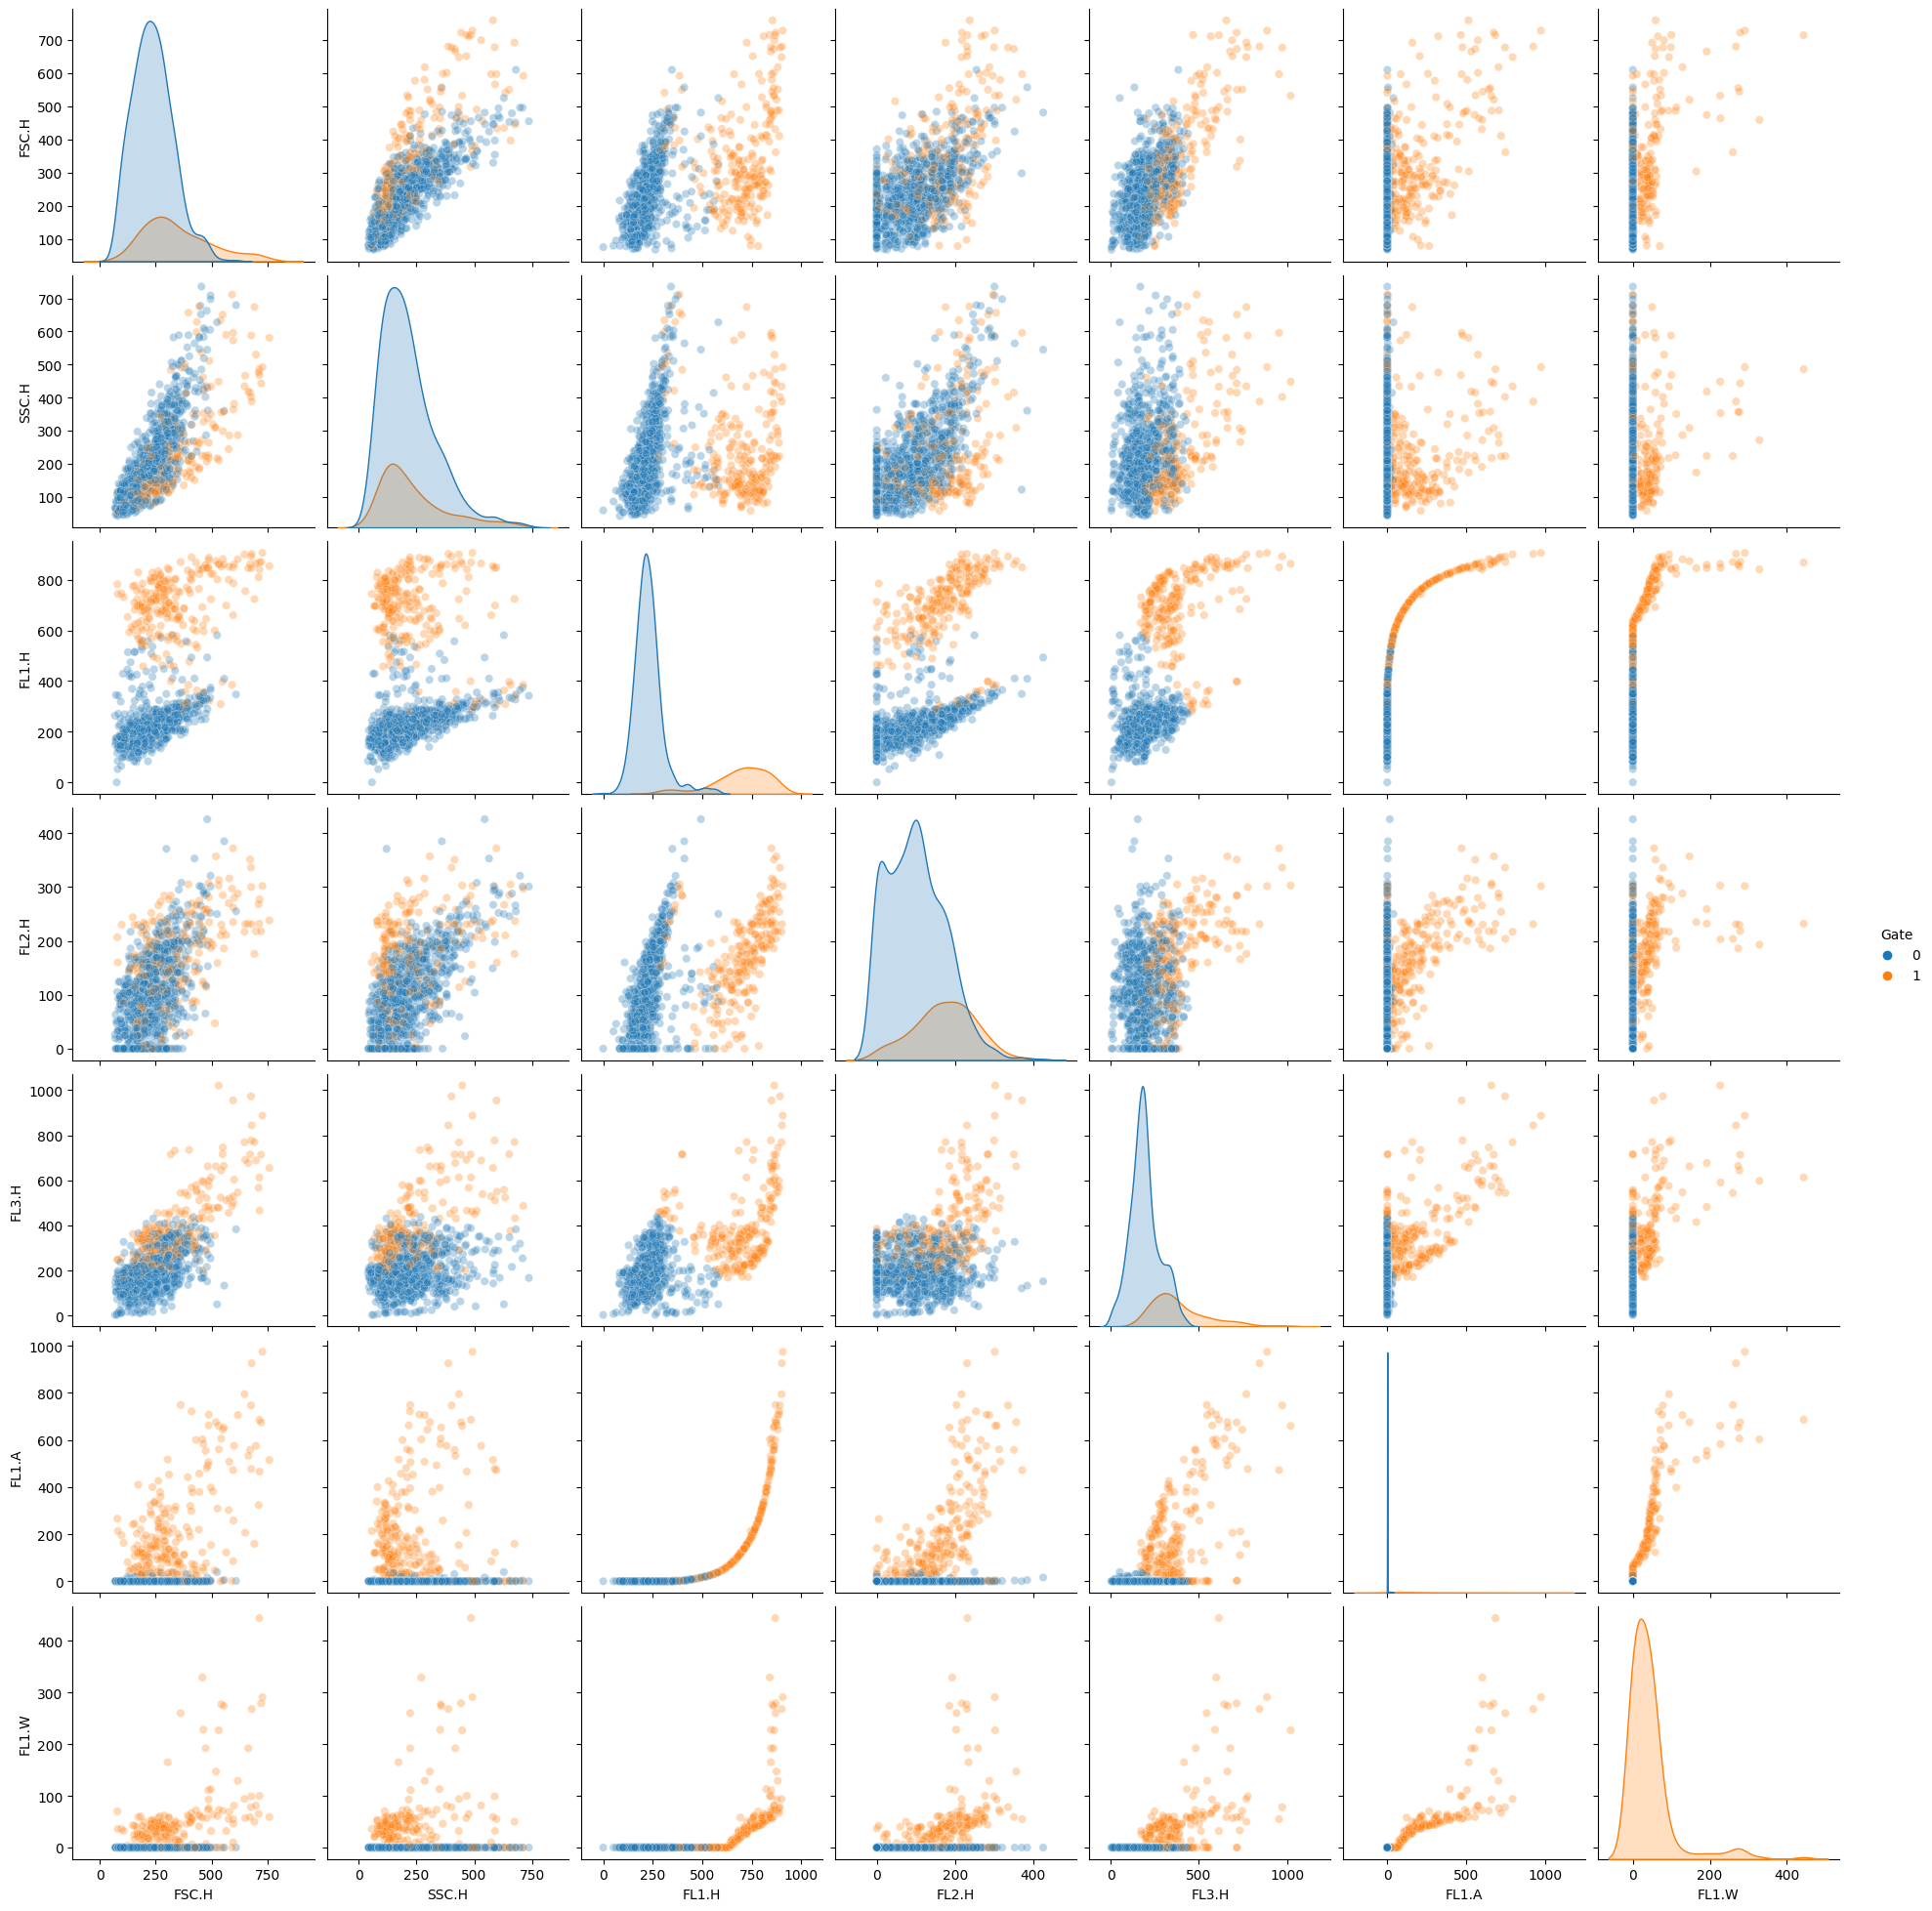

In [6]:
ax=sb.pairplot(train_set,hue='Gate',plot_kws={'alpha':0.3})
ax.fig.set_size_inches(20,20);

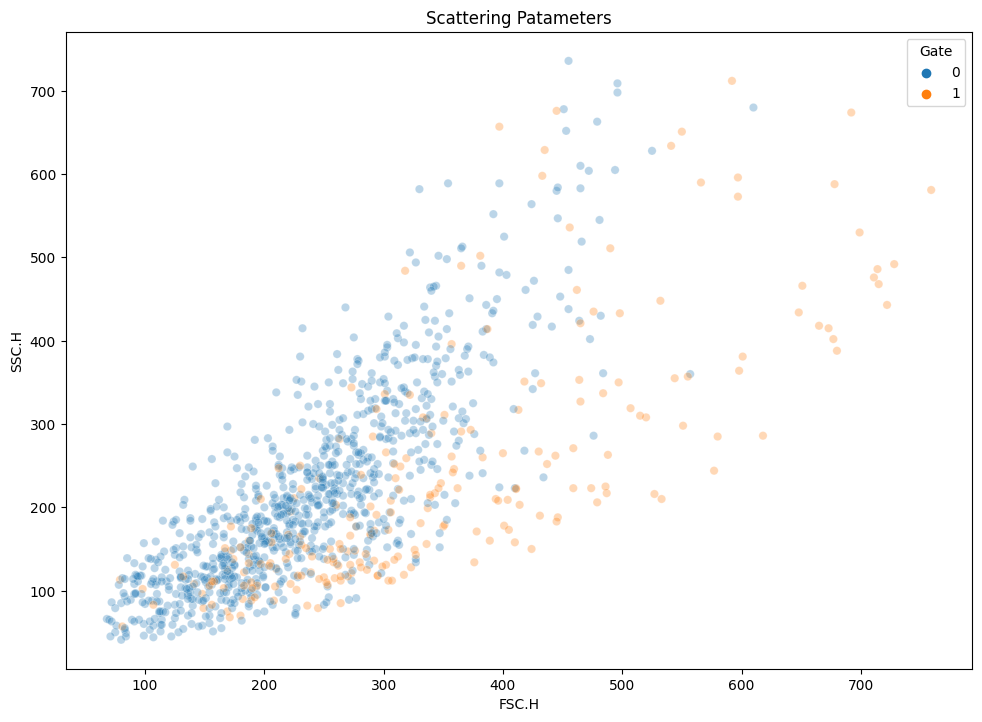

In [7]:
fig,ax=plt.subplots()
fig.set_size_inches(11.7,8.27)
ax=sb.scatterplot(x="FSC.H",y="SSC.H",hue="Gate",data=train_set,alpha=0.3)#gives plot of fsch ssch
ax.set_title("Scattering Patameters");

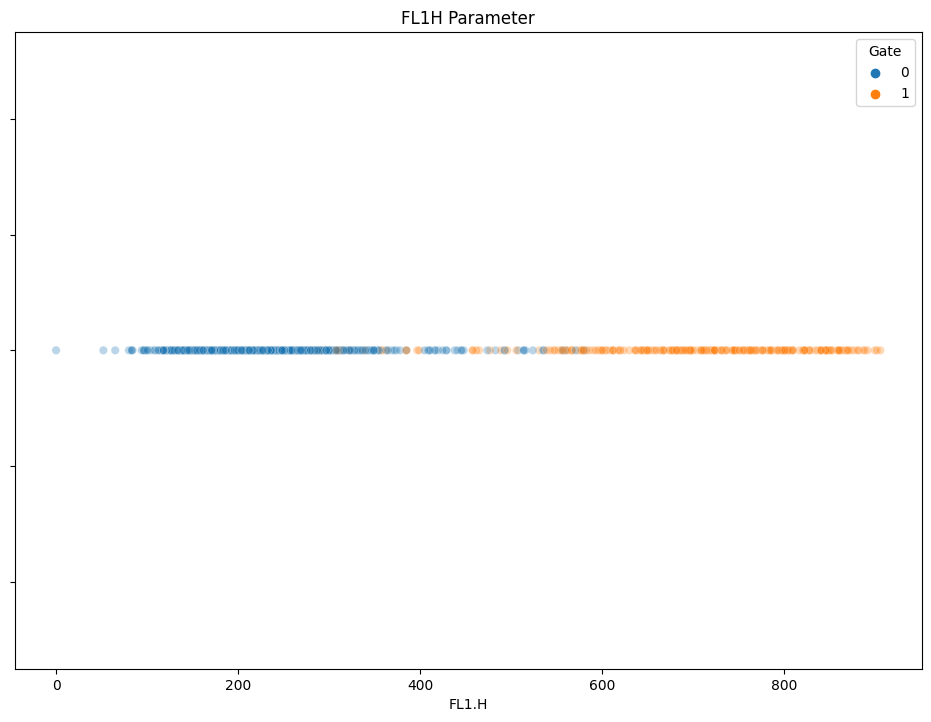

In [8]:
fig,ax=plt.subplots()
fig.set_size_inches(11.7,8.27)
ax = sb.scatterplot(x="FL1.H",y=1,hue="Gate",data=train_set,alpha=0.3)
ax.set_title("FL1H Parameter");
ax.set_yticklabels([]);


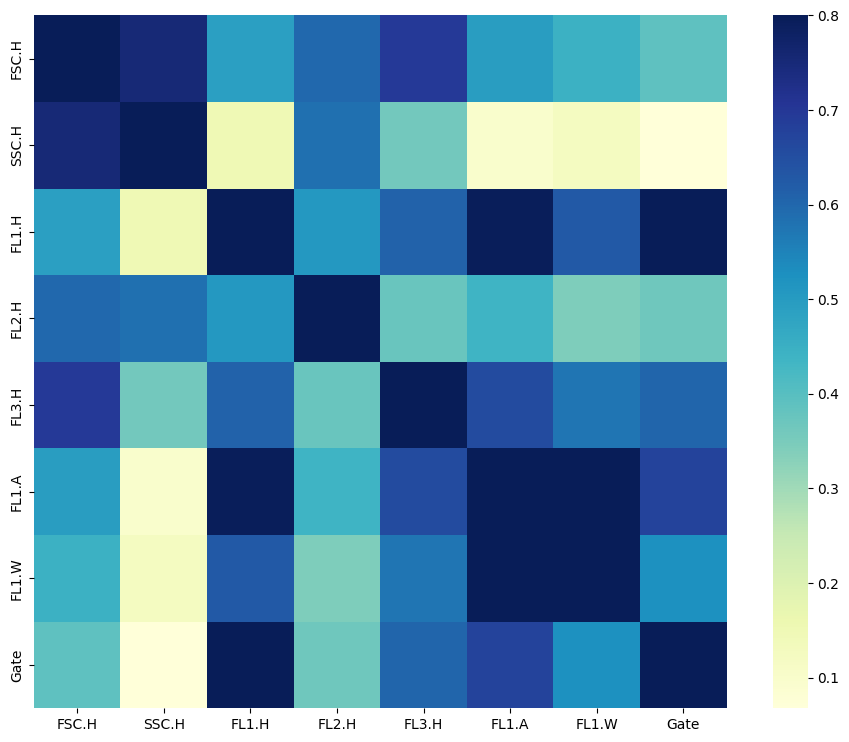

In [9]:
corrmat = train_set.corr()
f,ax = plt.subplots(figsize=(12,9))
sb.heatmap(corrmat,vmax=.8,square=True,cmap='YlGnBu');

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
train_no_labels=train_set.drop('Gate',axis=1)
#model training
principalComponents = pca.fit_transform(train_no_labels)
principalDf = pd.DataFrame(data = principalComponents,columns=['pc1','pc2','pc3'])
finalDf =pd.concat([principalDf,train_set['Gate']],axis=1)
s=pca.explained_variance_ratio_.sum()
print('The first 3 principal components explain ',round(s*100,2),'% of the varience of the data')


The first 3 principal components explain  92.32 % of the varience of the data


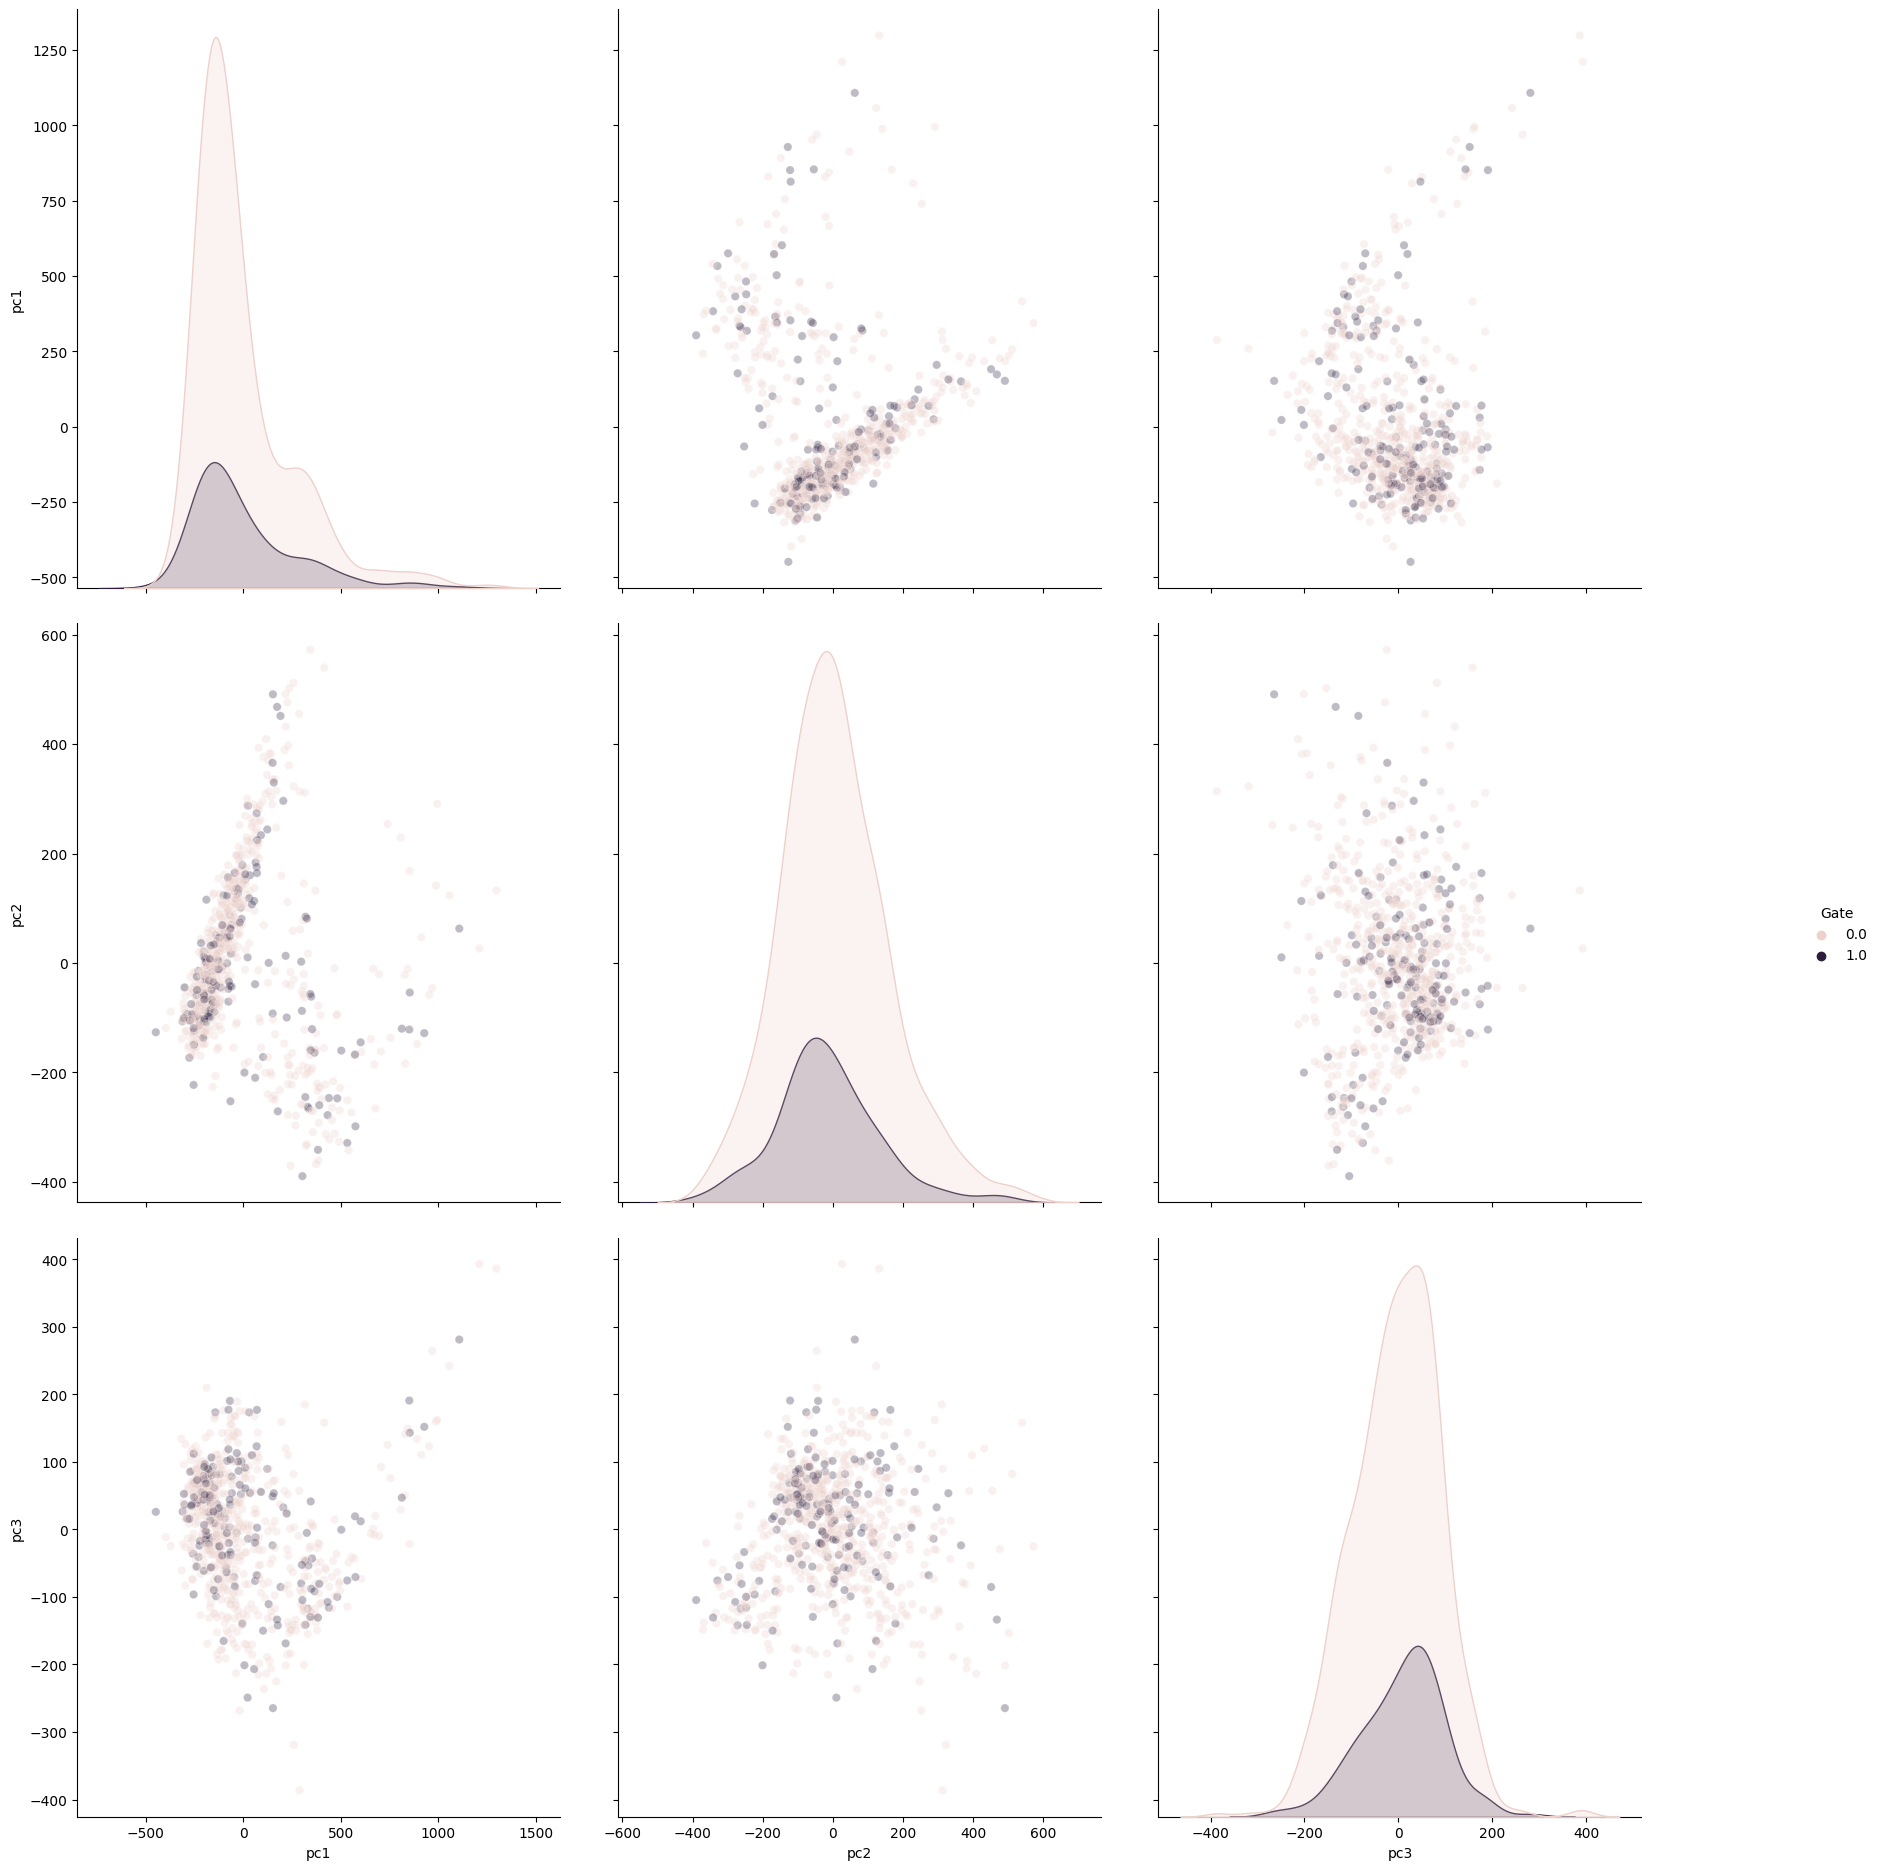

In [11]:
ax=sb.pairplot(finalDf,hue='Gate',plot_kws={'alpha':0.3},vars=['pc1','pc2','pc3'])
ax.fig.set_size_inches(20,20)
#in the results the seperation i not clearly visible

The scatter plot of the K Means clustering is shown below
The Green points correspond to points that were assigned to the wrong class


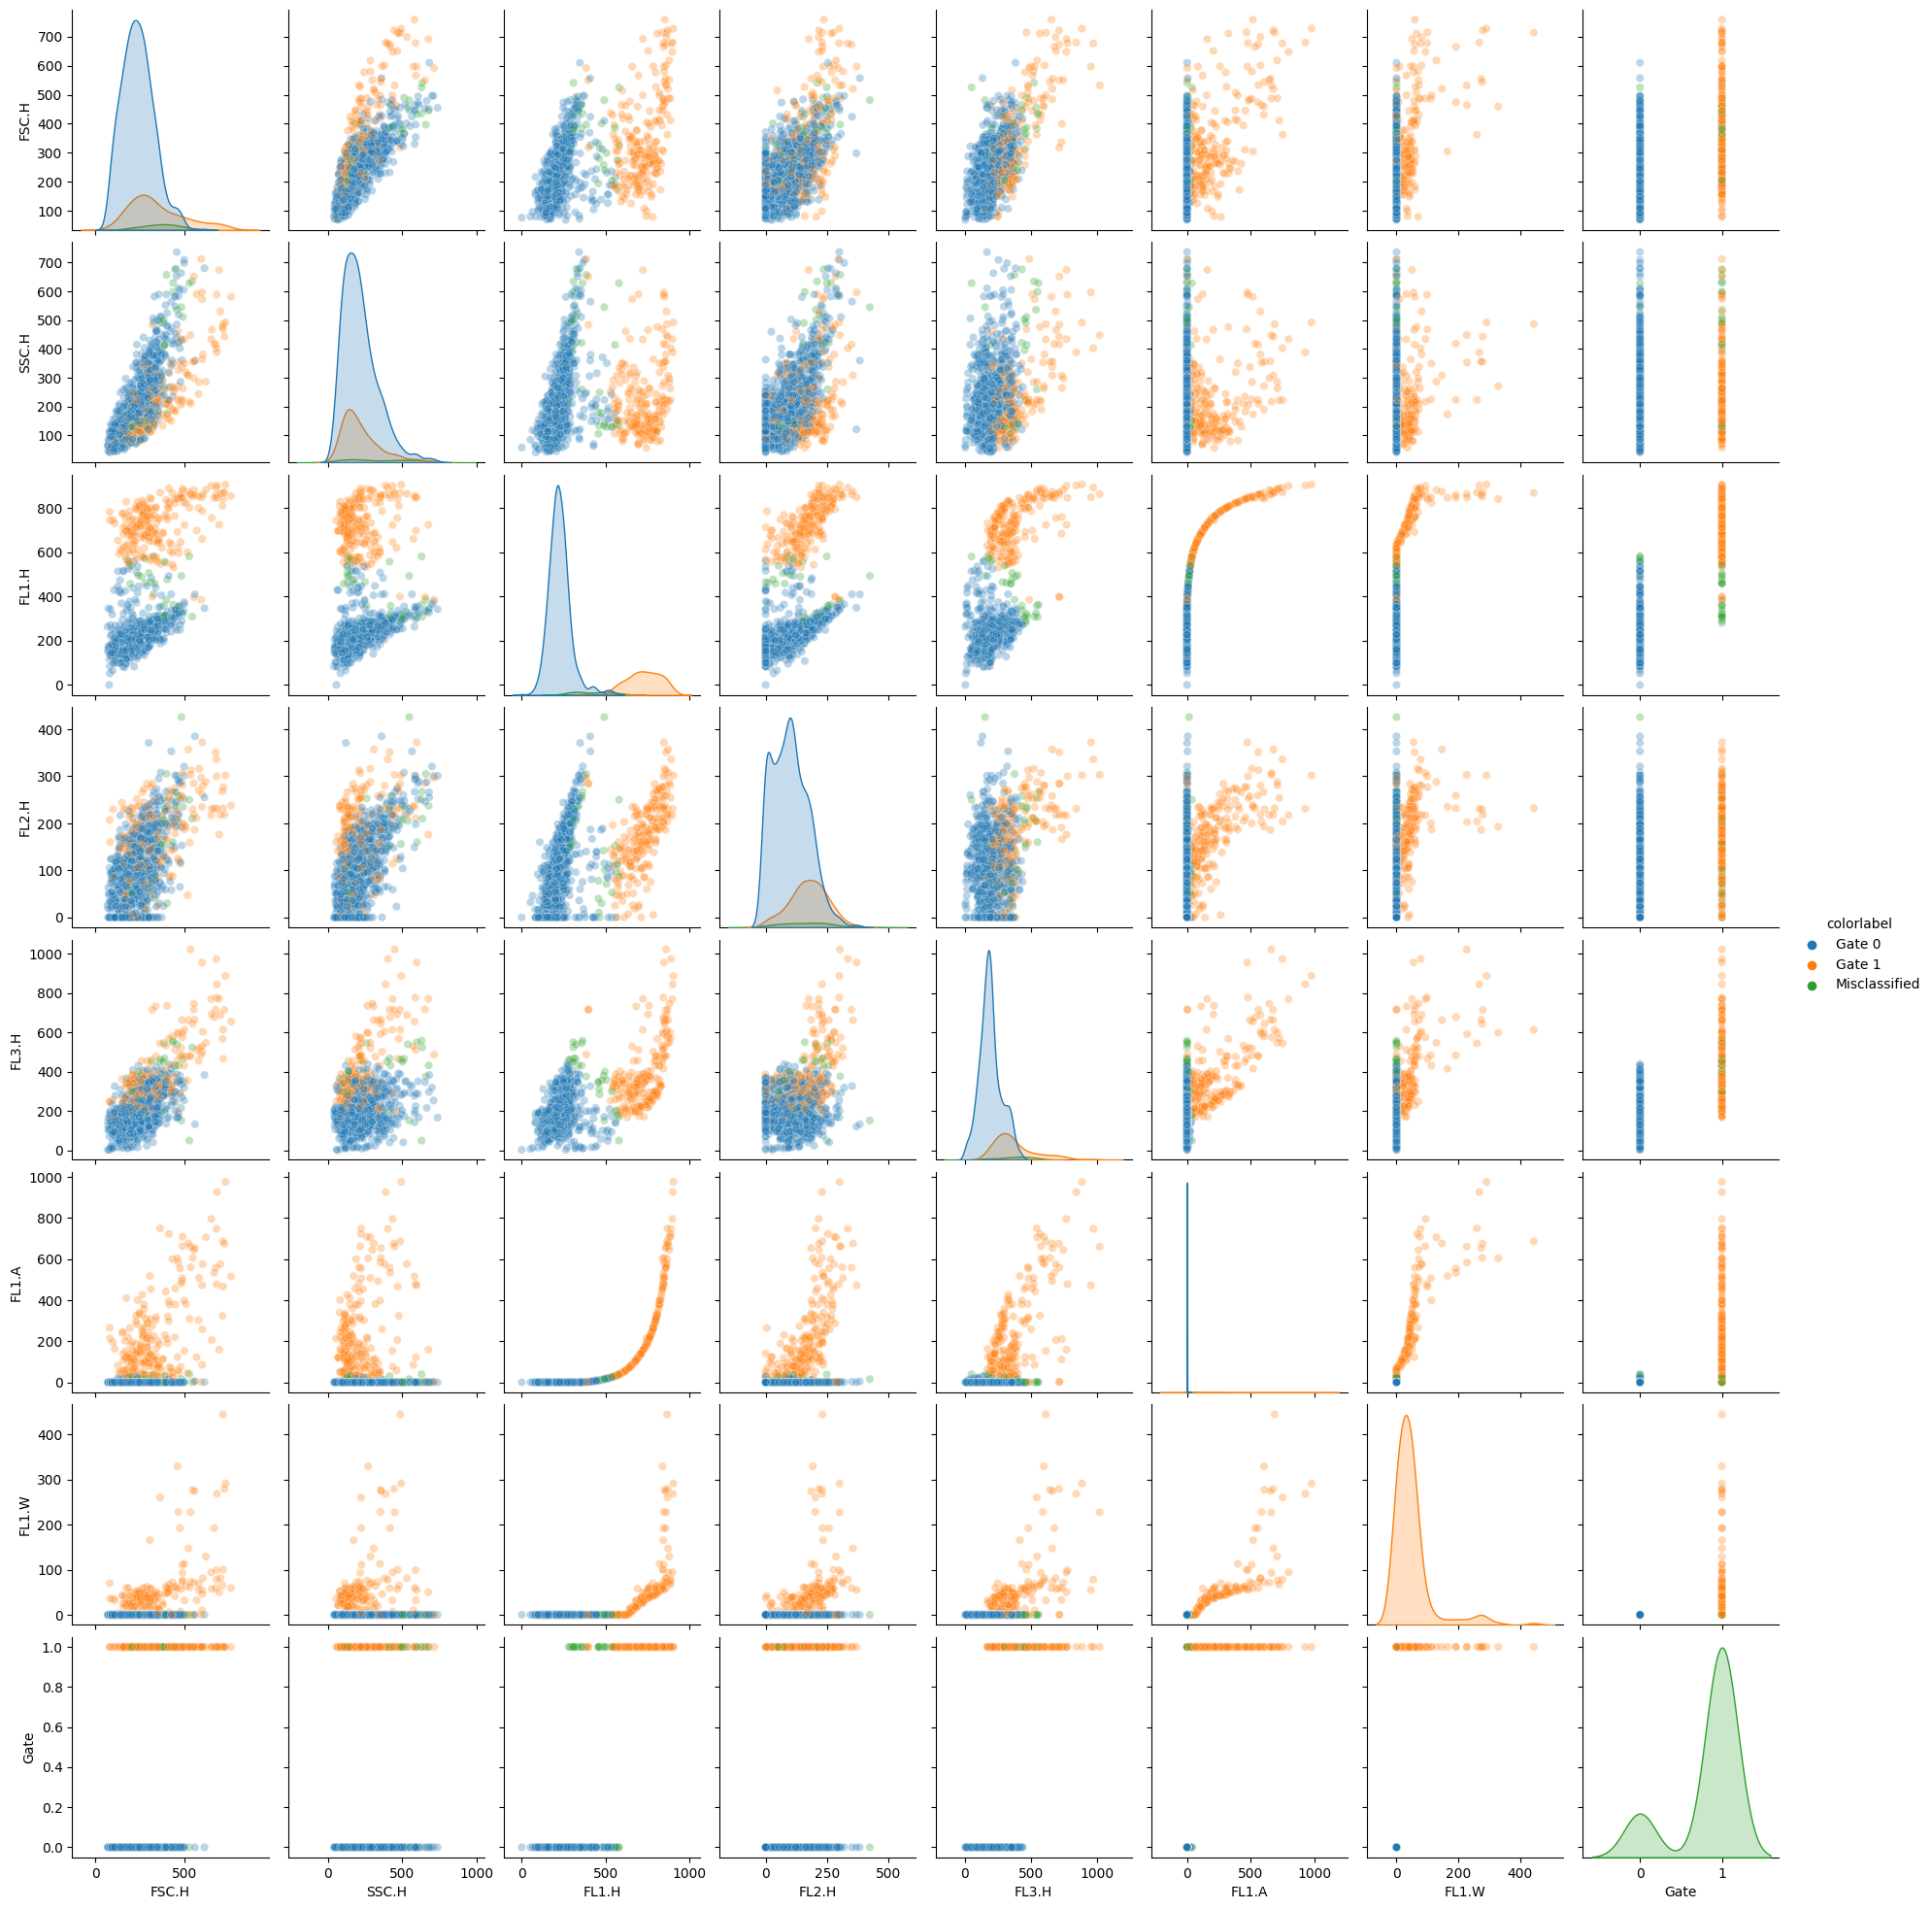

In [14]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(train_no_labels)
kmlabels=pd.DataFrame(Kmean.labels_)
tkl=train_set.copy()
kmlabels = kmlabels.set_index(train_set.index)
tkl['km']=kmlabels
#running k means on seperate occasions may yirld different values for the labels,in this case0 or 1
#The following is a probably bad way of setting the output of the k means labelling to be the one that I wannt so that graph labels are correct
def g(row):
    if (row['km'==0]):
        val = 1
    elif (row['km']==1):
        val=0
    return val
if ((tkl['km'].iloc[0]!=0)and (tkl['km'].iloc[1]!=0)):
     tkl['km']=tkl.apply(g,axis=1)
    
def f(row):
    if (row['Gate']==row['km']and row['Gate']==0):
        val = 'Gate 0'
    elif (row['Gate']==row['km'] and row['Gate']==1):
        val = 'Gate 1'
    elif row['Gate']!=row['km']:
        val = 'Misclassified'
    
    return val
tkl['colorlabel']=tkl.apply(f,axis=1)
tkl.head()
print('The scatter plot of the K Means clustering is shown below\nThe Green points correspond to points that were assigned to the wrong class')
ax=sb.pairplot(tkl,hue='colorlabel',plot_kws={'alpha':0.3},vars=['FSC.H','SSC.H','FL1.H','FL2.H','FL3.H','FL1.A','FL1.W','Gate'])
ax.fig.set_size_inches(20,20);

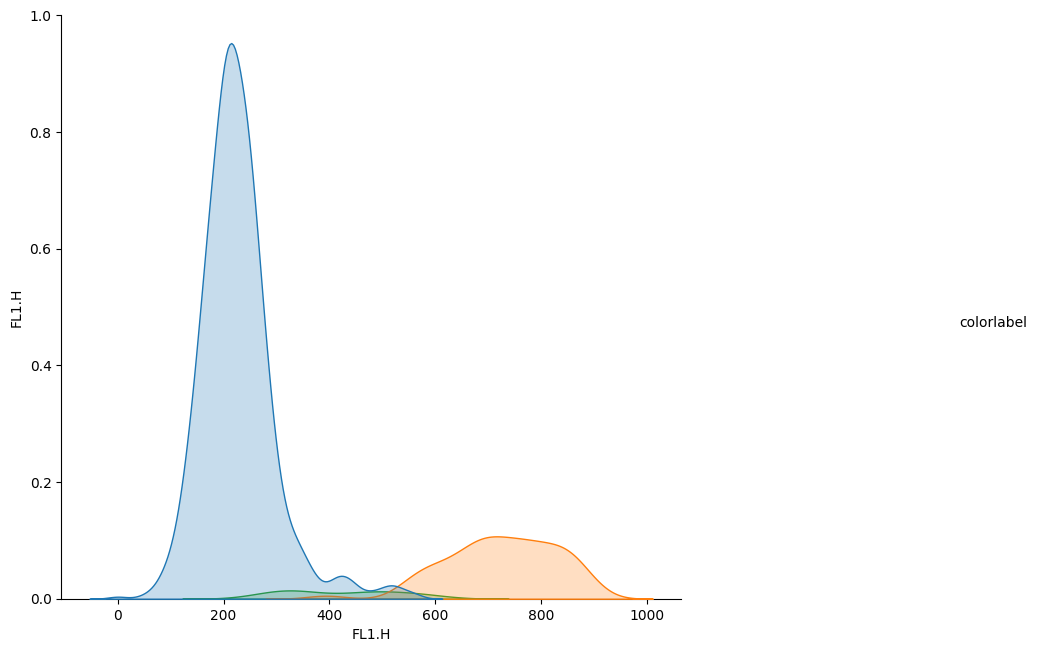

In [15]:
    ax=sb.pairplot(data=tkl,hue='colorlabel',vars=['FL1.H'])
    ax.fig.set_size_inches(12,8);

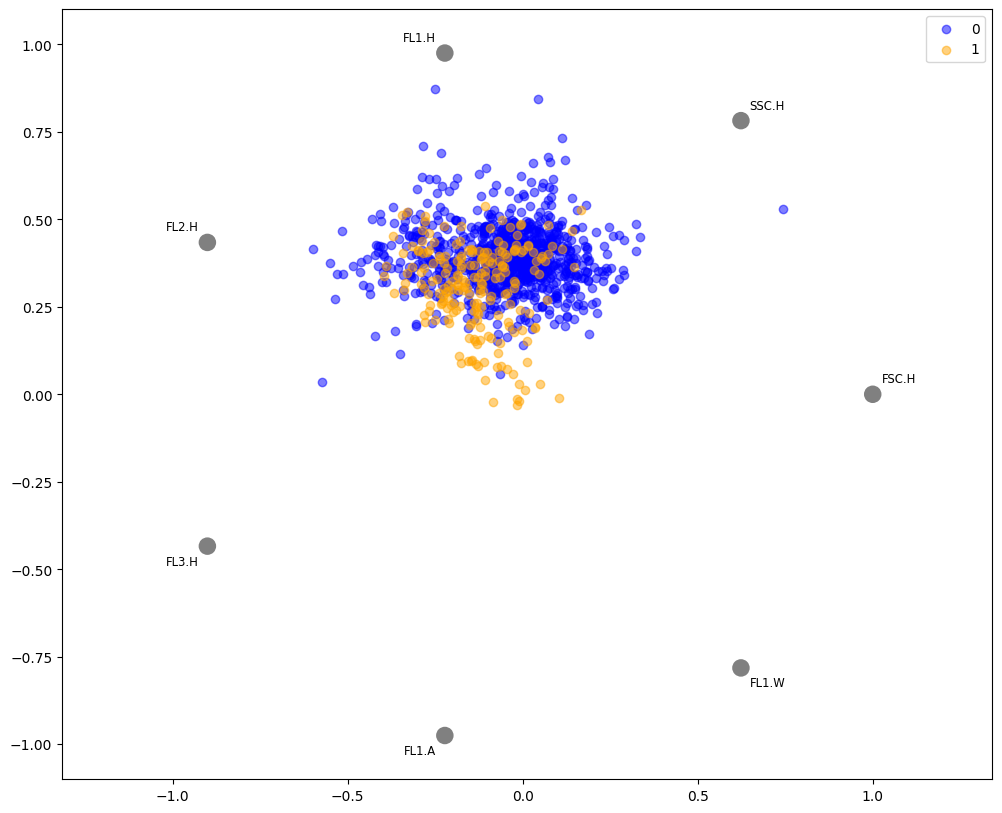

In [16]:
from pandas.plotting import radviz
fig = plt.figure()
fig.set_size_inches(12,10)

tr  =tkl.drop(['Gate','colorlabel'],axis=1)
tr.head()
rad_viz = pd.plotting.radviz(tr,'km',color=['blue','orange'],alpha=0.5)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
knn = KNeighborsClassifier()
train_labels = train_set.copy()['Gate']
grid_search=GridSearchCV(knn,param_grid,cv=5,scoring='accuracy',return_train_score=True)
grid_search.fit(train_no_labels,train_labels);
c=grid_search.cv_results_
print('10 k Nearest Neighbors classifiers were trained on 5 stratified subsets of the data and evaluated on the part that was not used for trainng/n')
print('Evaluating K Nearest Neighbors classifier predictions.........\n')
print('The mean accuracy score for the 10 classfiers on the 5 folds are shown below')

for mean_score,params in zip(c['mean_test_score'],c['params']):
    print(round(mean_score,5),params)
print('The optimal model has mean score ',round(c['mean_test_score'][4],4))

10 k Nearest Neighbors classifiers were trained on 5 stratified subsets of the data and evaluated on the part that was not used for trainng/n
Evaluating K Nearest Neighbors classifier predictions.........

The mean accuracy score for the 10 classfiers on the 5 folds are shown below
0.98818 {'n_neighbors': 1}
0.98363 {'n_neighbors': 2}
0.9909 {'n_neighbors': 3}
0.98999 {'n_neighbors': 4}
0.99181 {'n_neighbors': 5}
0.9909 {'n_neighbors': 6}
0.98908 {'n_neighbors': 7}
0.98726 {'n_neighbors': 8}
0.98817 {'n_neighbors': 9}
0.98817 {'n_neighbors': 10}
The optimal model has mean score  0.9918


In [18]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth':[2,4,6,8,10]}
tree=DecisionTreeClassifier()
grid_search=GridSearchCV(tree,param_grid,cv=5,scoring='accuracy',return_train_score=True)
grid_search.fit(train_no_labels,train_labels);
c=grid_search.cv_results_
print('10 k Nearest Neighbors classifiers were trained on 5 stratified subsets of the data and evaluated on the part that was not used for trainng/n')
print('Evaluating K Nearest Neighbors classifier predictions.........\n')
print('The mean accuracy score for the 10 classfiers on the 5 folds are shown below')

for mean_score,params in zip(c['mean_test_score'],c['params']):
    print(round(mean_score,5),params)
print('The optimal depth of the decision trree with the settings chosen is',grid_search.best_params_['max_depth'])

10 k Nearest Neighbors classifiers were trained on 5 stratified subsets of the data and evaluated on the part that was not used for trainng/n
Evaluating K Nearest Neighbors classifier predictions.........

The mean accuracy score for the 10 classfiers on the 5 folds are shown below
0.98089 {'max_depth': 2}
0.98908 {'max_depth': 4}
0.98636 {'max_depth': 6}
0.98726 {'max_depth': 8}
0.98999 {'max_depth': 10}
The optimal depth of the decision trree with the settings chosen is 10


In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
log_clf=SGDClassifier(loss='log',random_state=42)
cv=cross_validate(log_clf,train_no_labels,train_labels,scoring='accuracy',cv=StratifiedKFold(5))
s=0

print("Evaluating Logistic Regression Model predictions.....\n")
for i,x in enumerate(cv['test_score']):
    s+=x
    print('The accuracy of the Logisttic classifier on fold ',i+1,'is',round(x,5))
print('\n The mean of the accuracy of the model on the 5 folds is ',round(s/5,4))


Evaluating Logistic Regression Model predictions.....

The accuracy of the Logisttic classifier on fold  1 is 0.97273
The accuracy of the Logisttic classifier on fold  2 is 0.95455
The accuracy of the Logisttic classifier on fold  3 is 0.97273
The accuracy of the Logisttic classifier on fold  4 is 0.94091
The accuracy of the Logisttic classifier on fold  5 is 0.96804

 The mean of the accuracy of the model on the 5 folds is  0.9618


In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# load dataset
dataset = np.loadtxt("C:\\Users\\91888\\Downloads\\rituximab.csv", delimiter=",", skiprows=1)

# split dataset into features and labels
X = dataset[:,0:8]
y = dataset[:,8]

# split dataset into train and test sets
train_no_labels, test_no_labels, train_labels, test_labels = train_test_split(X, y, test_size=0.01, random_state=1)

# define the model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model on the training dataset
model.fit(train_no_labels, train_labels, epochs=100, batch_size=10, verbose=0)
print("Training Multi Layer Perceptron .....")

# evaluate the model on the test dataset
model.evaluate(train_no_labels,train_labels)
print('Evaluating model in test set')
y_pred = (model.predict(test_no_labels) >= 0.5).astype("int32")
n_test_labels = len(test_labels)
n_y_pred = len(y_pred)
assert n_test_labels == n_y_pred, "Error: Number of test labels and predictions do not match."
mlp_score = accuracy_score(test_labels, y_pred)
print('The Accuracy of the Multi Layer Perceptron on the test set is', round(mlp_score, 4))


Training Multi Layer Perceptron .....
48/48 [==============================] - 0s 1ms/step - loss: -30239.6855 - accuracy: 0.6723
Evaluating model in test set
1/1 [==============================] - 0s 62ms/step
The Accuracy of the Multi Layer Perceptron on the test set is 0.875


In [21]:
from sklearn.ensemble import RandomForestClassifier
forest_clf =RandomForestClassifier(n_estimators=100,max_depth=4);
forest_clf.fit(train_no_labels,train_labels);
print('Evaluating Random Forest Classifier predictions on the training set......\n')
print('The accuracy of the Random Forest Classifier with 100 trees on the training set is ',round(forest_clf.score(train_no_labels,train_labels),4))


Evaluating Random Forest Classifier predictions on the training set......

The accuracy of the Random Forest Classifier with 100 trees on the training set is  0.9366


In [22]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('for',forest_clf),('log',SGDClassifier(loss='log',random_state=42)),('knn',KNeighborsClassifier(n_neighbors=5))],voting='hard')
voting_clf.fit(train_no_labels,train_labels);
print('Evaluating Voting Classifier predictions on the training set....\n')
print('The accuracy of the voting Classifier on the trading set is ',round(voting_clf.score(train_no_labels,train_labels),4))

Evaluating Voting Classifier predictions on the training set....

The accuracy of the voting Classifier on the trading set is  0.9523


In [23]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('for',forest_clf),('log',SGDClassifier(loss='log',random_state=42)),('knn',KNeighborsClassifier(n_neighbors=5))],voting='hard')
voting_clf.fit(train_no_labels,train_labels);
print('Evaluating Voting Classifier predictions on the training set....\n')
print('The accuracy of the voting Classifier on the trading set is ',round(voting_clf.score(train_no_labels,train_labels),4))

Evaluating models on test set...

Accuracy score for KNeighbors Classifier on test set is 93.75 %
Accuracy score for Logistic Regression model on test set is 75.0 %
Accuracy score for Multi Layer Perceptron on test set is 87.5 %
Accuracy score for voting Classifier on test set is 93.75 %
Accuracy score for Random Forest Classifier on test set is 93.75 %
